In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v1.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data
from constants import SP500_TICKER, DJI_TICKER
import numpy as np

---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 118593 (463.25 KB)
Trainable params: 118593 (463.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data(DJI_TICKER)

x_train, y_train, dates_train = train.get_tensors()
x_test, y_test, dates_test = test.get_tensors()
x_predict, y_predict, dates_predict = predict.get_tensors()

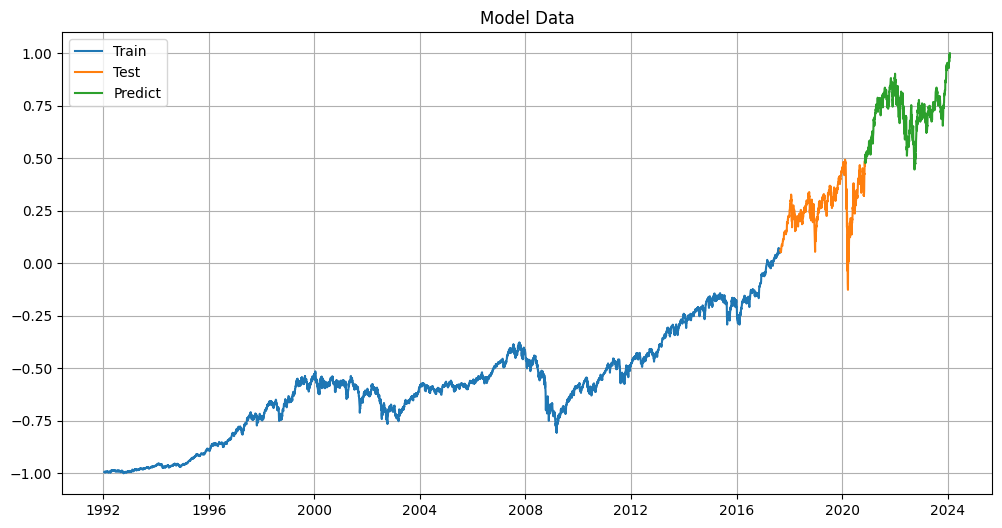

In [5]:
plt = config_chart('Model Data')
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.plot(dates_predict, y_predict)
plt.legend(['Train', 'Test', 'Predict'])

Epoch 1/100


202/202 - 5s - loss: 0.0192 - mean_absolute_error: 0.0571 - 5s/epoch - 27ms/step
Epoch 2/100
202/202 - 2s - loss: 1.8079e-04 - mean_absolute_error: 0.0100 - 2s/epoch - 9ms/step
Epoch 3/100
202/202 - 2s - loss: 1.7345e-04 - mean_absolute_error: 0.0097 - 2s/epoch - 9ms/step
Epoch 4/100
202/202 - 2s - loss: 1.8081e-04 - mean_absolute_error: 0.0101 - 2s/epoch - 9ms/step
Epoch 5/100
202/202 - 2s - loss: 1.7555e-04 - mean_absolute_error: 0.0099 - 2s/epoch - 9ms/step
Epoch 6/100
202/202 - 2s - loss: 1.6300e-04 - mean_absolute_error: 0.0094 - 2s/epoch - 9ms/step
Epoch 7/100
202/202 - 2s - loss: 1.9351e-04 - mean_absolute_error: 0.0105 - 2s/epoch - 9ms/step
Epoch 8/100
202/202 - 2s - loss: 1.7552e-04 - mean_absolute_error: 0.0100 - 2s/epoch - 9ms/step
Epoch 9/100
202/202 - 2s - loss: 1.9459e-04 - mean_absolute_error: 0.0107 - 2s/epoch - 9ms/step
Epoch 10/100
202/202 - 2s - loss: 1.8044e-04 - mean_absolute_error: 0.0101 - 2s/epoch - 9ms/step
Epoch 11/100
202/202 - 2s - loss: 1.7727

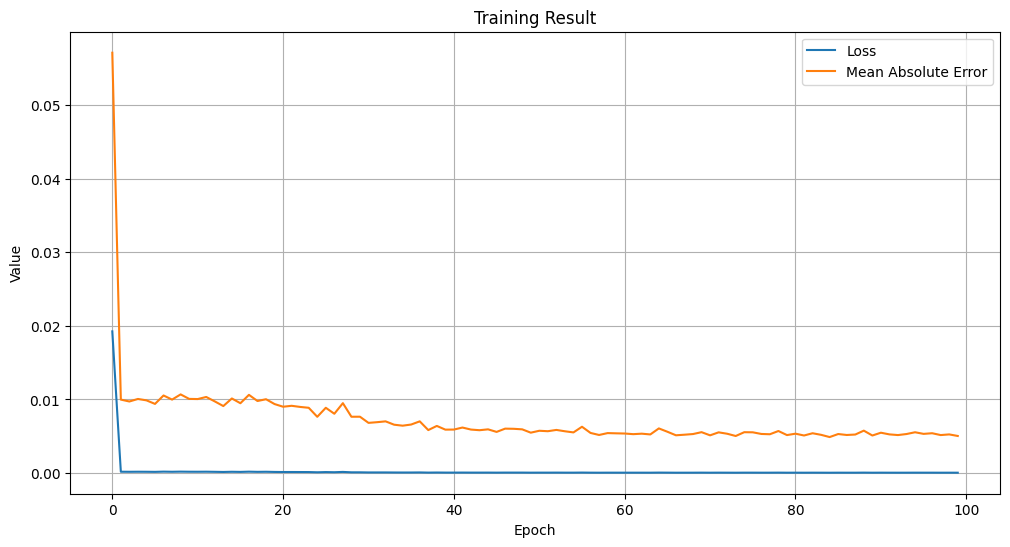

INFO:tensorflow:Assets written to: ./models/lstm_v1/lstm_model_v1\assets


INFO:tensorflow:Assets written to: ./models/lstm_v1/lstm_model_v1\assets


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)
plot_model_performance(fit_result)
save_lstm_model(model)

In [7]:
model = load_lstm_model()

26/26 [==============================] - 1s 5ms/step


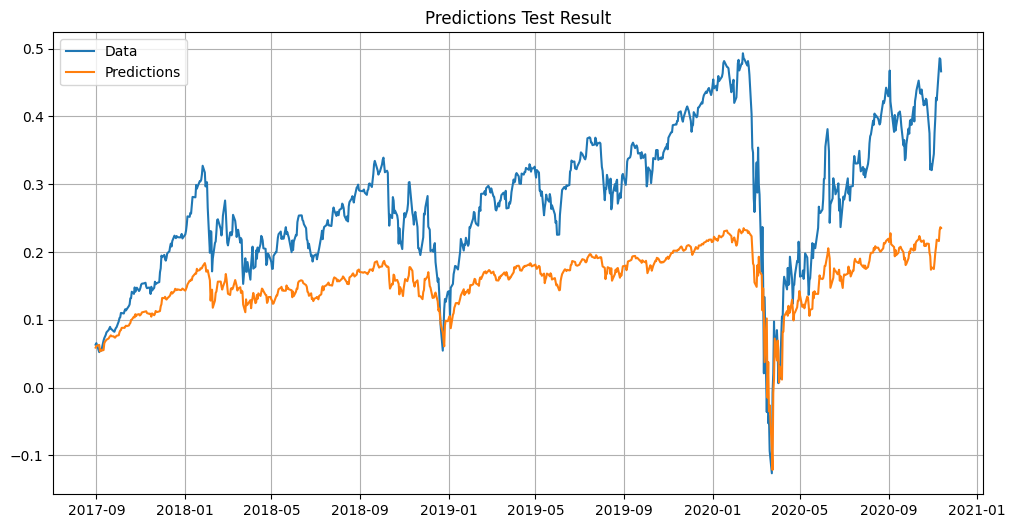

In [8]:
predictions = model.predict(x_test)

plt = config_chart('Predictions Test Result')
plt.plot(dates_test, y_test)
plt.plot(dates_test, predictions)
plt.legend(['Data', 'Predictions'])

26/26 [==============================] - 0s 7ms/step


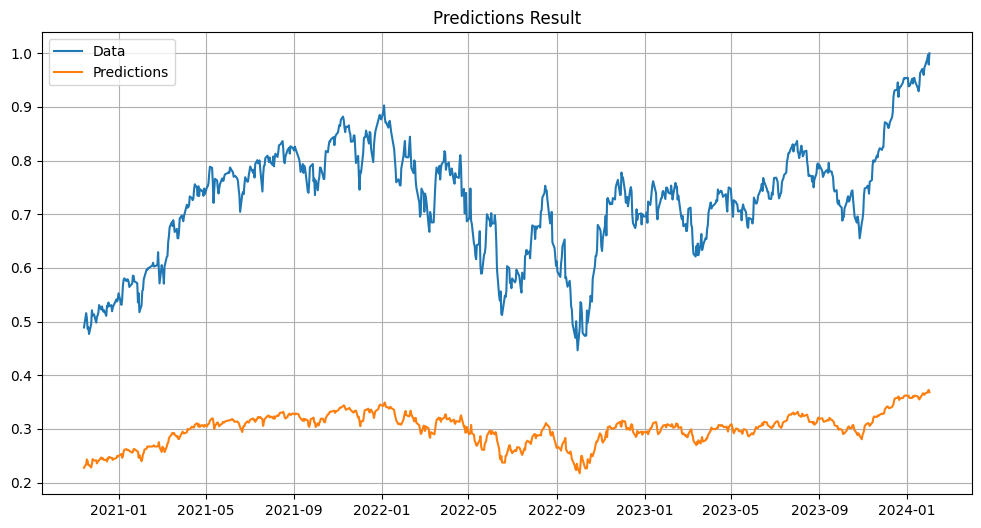

In [9]:
predictions = model.predict(x_predict)

plt = config_chart('Predictions Result')
plt.plot(dates_predict, y_predict)
plt.plot(dates_predict, predictions)
plt.legend(['Data', 'Predictions'])

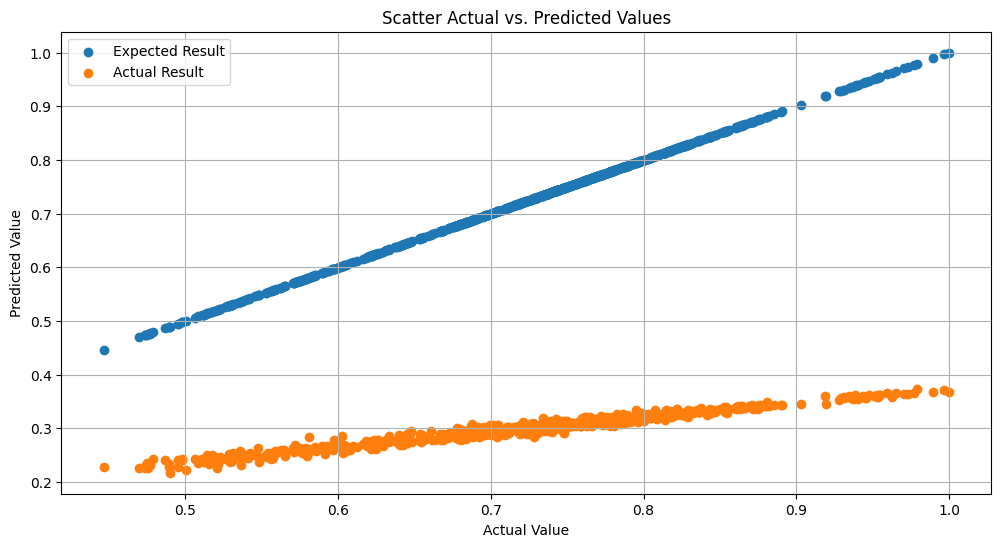

In [10]:
plot_scatter_data(y_predict, predictions)

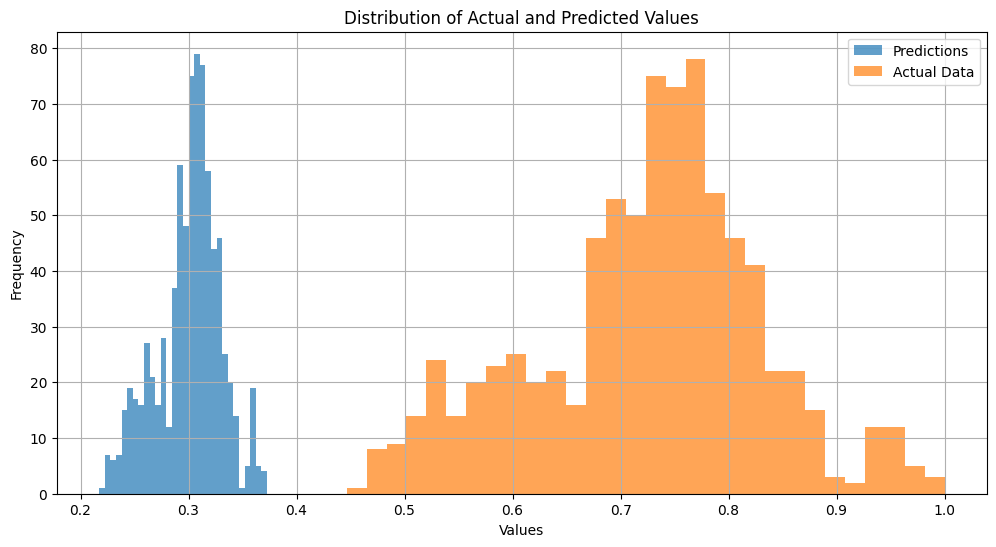

In [11]:
plot_distribution_data(y_predict, predictions)

[0.32068175 0.34461688 0.37598645 0.39676639 0.42743173 0.4236571
 0.4708303  0.48569323 0.48437684 0.4664327 ]


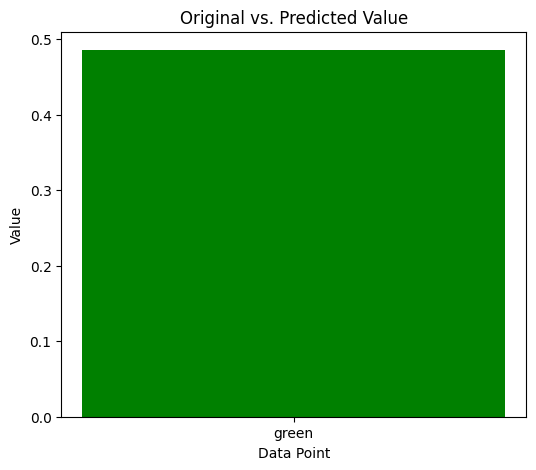

In [12]:
index = 10

# plt = config_chart('Predictions Result')
# plt.plot(dates_predict, x_predict[0])
# plt.plot(dates_predict[index], y_predict[index])
# plt.plot(dates_predict[index], predictions[index])
# plt.legend(['Data', 'Predictions'])

stock_data = np.array(y_predict).flatten()
model_data = np.array(predictions).flatten()

print( np.array(x_predict[0]))

# labels = ['Original', 'Predicted']
# values = [stock_data[index], model_data[index]]
values = np.array(x_predict[0])

labels = ['green' if value > 0 else 'red' for value in values]
colors = ['green' if value > 0 else 'red' for value in values]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=colors, width=0.4)  # Adjust width as needed

plt.title('Original vs. Predicted Value')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.xticks(rotation=0)  # Remove x-axis rotation
# Gridlines
# plt.grid(axis='y')
plt.show()


# plot_prediction_comparison(y_predict, predictions)

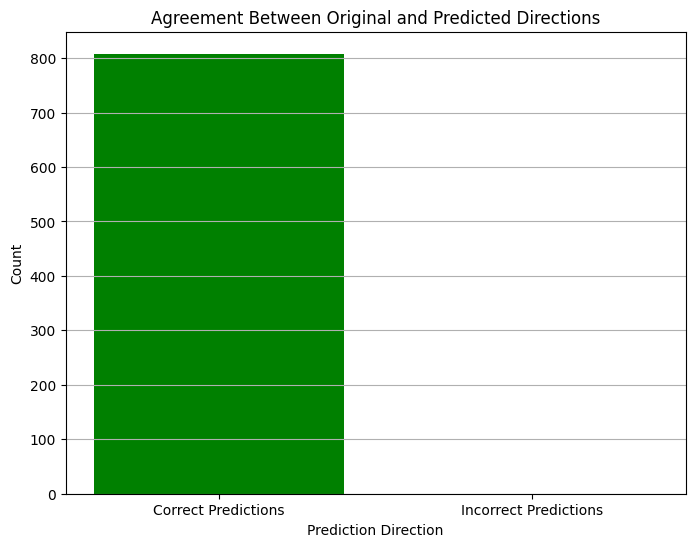

In [13]:
def plot_direction_comparison(original_changes, predicted_changes):

  if original_changes.shape != predicted_changes.shape:
    raise ValueError("Arrays must have the same shape.")

  # Calculate direction changes (positive, negative, or zero)
  original_directions = np.sign(original_changes)  # 1 for positive, -1 for negative, 0 for no change
  predicted_directions = np.sign(predicted_changes)

  # Calculate agreement (True for correct direction prediction, False otherwise)
  agreement = original_directions == predicted_directions

  # Count correct and incorrect predictions
  correct = np.sum(agreement)
  incorrect = len(agreement) - correct

  # Create bar chart data
  labels = ['Correct Predictions', 'Incorrect Predictions']
  counts = [correct, incorrect]

  # Plot the agreement results as a bar chart
  plt.figure(figsize=(8, 6))
  plt.bar(labels, counts, color=['green', 'red'])

  # Customize plot elements (labels, title, legend)
  plt.xlabel('Prediction Direction')
  plt.ylabel('Count')
  plt.title('Agreement Between Original and Predicted Directions')

  plt.grid(axis='y')  # Gridlines only on the y-axis
  plt.show()


plot_direction_comparison(y_predict, predictions)